In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


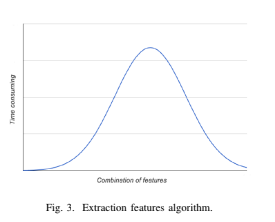

In [ ]:
!pip install joblib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


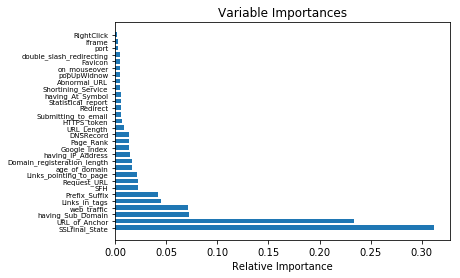

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/dataset.csv")
x = dataset.iloc[: , :-1].values
y = dataset.iloc[:, -1:].values

In [ ]:
dataset

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,1,1,-1,-1,1,-1,1,1,0,-1,1,-1,1,1,1,1,-1,1,1,1,-1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

In [ ]:
len(x_train)

8291

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1, 10, 100, 1000], 'gamma': [ 0.1, 0.2,0.3, 0.5]}]
grid_search = GridSearchCV(SVC(kernel='rbf' ),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.5]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 

Best Accurancy =0.964660211399458
best parameters ={'C': 1000, 'gamma': 0.2}


#SVM WITHOUT GA

In [ ]:
classifier = SVC( kernel = 'rbf' , random_state = 0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1148  101]
 [  58 1457]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9424746743849494

#logistic without GA


In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

#predicting the tests set result
y_pred = classifier.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


[[1121  128]
 [  84 1431]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9232995658465991

#RANDOM FORREST WITHOUT GA

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)
#printing best parameters 
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Accurancy =0.9724997473298765
best parameters ={'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[1182   67]
 [  19 1496]]


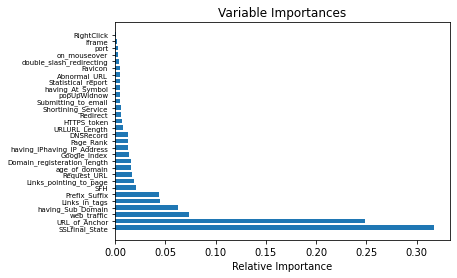

0.9688856729377714

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators =100, criterion = "gini", max_features = 'sqrt',  random_state = 0)
classifier.fit(x_train, y_train)

#predicting the tests set result
y_pred = classifier.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



#-------------Features Importance random forest
names = dataset.iloc[:,:-1].columns
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])



#-------------plotting variable importance
plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.7)
plt.yticks(np.arange(len(names)), names[indices], fontsize=7)
plt.xlabel('Relative Importance')
plt.show()
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)




#KNN without GA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = neigh.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

[[1156   93]
 [  49 1466]]


0.9486251808972503

#GENETIC ALGORITHM

In [ ]:
pip install deap

     |████████████████████████████████| 163kB 2.7MB/s 


In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from deap import creator, base, tools, algorithms
from sklearn.ensemble import RandomForestClassifier
import sys
import statistics

In [ ]:
def getFitness(individual, X, y):
    """
    Feature subset fitness function
    """

    if(individual.count(0) != len(individual)):
        # get index with value 0
        cols = [index for index in range(
            len(individual)) if individual[index] == 0]

        # get features subset
        X_parsed = X.drop(X.columns[cols], axis=1)
        X_subset = pd.get_dummies(X_parsed)

        # apply classification algorithm
        clf =KNeighborsClassifier(n_neighbors=1)

        return (statistics.mean(cross_val_score(clf, X_subset, y, cv=5)),)
    else:
        return(0,)

#eaSimple GA

In [ ]:
def geneticAlgorithm(X, y, n_population, n_generation):
    """
    Deap global variables
    Initialize variables to use eaSimple
    """
    # create individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # create toolbox
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat,
                     creator.Individual, toolbox.attr_bool, len(X.columns))
    toolbox.register("population", tools.initRepeat, list,
                     toolbox.individual)
    toolbox.register("evaluate", getFitness, X=X, y=y)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # initialize parameters
    pop = toolbox.population(n=n_population)
    hof = tools.HallOfFame(n_population * n_generation)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # genetic algorithm
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2,
                                   ngen=n_generation, stats=stats, halloffame=hof,
                                   verbose=True)

    # return hall of fame
    return hof

In [ ]:
def bestIndividual(hof, X, y):
    """
    Get the best individual
    """
  
    maxAccurcy = 0.0
    for individual in hof:
        res = float('.'.join(str(ele) for ele in individual.fitness.values)) 
        if(res> maxAccurcy):
            maxAccurcy = res
            _individual = individual

    _individualHeader = [list(X)[i] for i in range(
        len(_individual)) if _individual[i] == 1]
    return _individual.fitness.values, _individual, _individualHeader

#Svm With eaSimple

In [ ]:
if __name__ == '__main__':
    # get dataframe path, population number and genedataframePath, n_pop, n_gen = getArguments()
    # read dataframe from csv
    df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')
    n_pop = 30
    n_gen= 2
    # encode labels column to numbers
    le = LabelEncoder()
    le.fit(df.iloc[:, -1])
    y = le.transform(df.iloc[:, -1])
    X = df.iloc[:, :-1]
    

    # get accuracy with all features
    individual = [1 for i in range(len(X.columns))]
    print("Accuracy with all features: \t" +
          str(getFitness(individual,X,y)) + "\n")

    # apply genetic algorithm
    hof = geneticAlgorithm(X, y, n_pop, n_gen)
    
    # select the best individual
    accuracy, individual, header = bestIndividual(hof,X, y)
    print('Best Accuracy: \t' + str(accuracy))
    print('Number of Features in Subset: \t' + str(individual.count(1)))
    print('Individual: \t\t' + str(individual))
    print('Feature Subset\t: ' + str(header))

Accuracy with all features: 	(0.9647218453188602,)



/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg    	min     	max     
0  	30    	0.90439	0.696608	0.948711
1  	15    	0.936526	0.883853	0.949616
2  	22    	0.942234	0.915332	0.954048
Best Accuracy: 	(0.9540479421076435,)
Number of Features in Subset: 	20
Individual: 		[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]
Feature Subset	: ['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'Prefix_Suffix', 'SSLfinal_State', 'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'Submitting_to_email', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'DNSRecord', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


In [ ]:
df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')

    # with feature subset
X = df[header]
clf=SVC(C=1000, kernel = 'rbf', gamma = 0.2 , random_state = 0)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy with Feature Subset: \t" + str(statistics.mean(scores)) + "\n")



Accuracy with Feature Subset: 	0.9540479421076435



#SVM with eaMUplusLambda

In [ ]:
if __name__ == '__main__':
    # get dataframe path, population number and genedataframePath, n_pop, n_gen = getArguments()
    # read dataframe from csv
    df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')
    n_pop = 30
    n_gen= 2
    # encode labels column to numbers
    le = LabelEncoder()
    le.fit(df.iloc[:, -1])
    y = le.transform(df.iloc[:, -1])
    X = df.iloc[:, :-1]
    

    # get accuracy with all features
    individual = [1 for i in range(len(X.columns))]
    print("Accuracy with all features: \t" +
          str(getFitness(individual,X,y)) + "\n")

    # apply genetic algorithm
    hof = geneticAlgorithm1(X, y, n_pop, n_gen)
    
    # select the best individual
    accuracy, individual, header = bestIndividual(hof,X, y)
    print('Best Accuracy: \t' + str(accuracy))
    print('Number of Features in Subset: \t' + str(individual.count(1)))
    print('Individual: \t\t' + str(individual))
    print('Feature Subset\t: ' + str(header))

Accuracy with all features: 	(0.9647218453188602,)



/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg         	min         	max         
0  	30    	[0.86767074]	[0.63699683]	[0.95070104]
1  	18    	[0.8965355] 	[0.77286296]	[0.95070104]
2  	19    	[0.9309905] 	[0.89217549]	[0.95802804]
Best Accuracy: 	(0.9580280416101312,)
Number of Features in Subset: 	20
Individual: 		[1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Feature Subset	: ['having_IPhaving_IP_Address', 'having_At_Symbol', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Redirect', 'on_mouseover', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


In [ ]:
df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')

    # with feature subset
X = df[header]
clf=SVC(C=1000, kernel = 'rbf', gamma = 0.2 , random_state = 0)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy with Feature Subset: \t" + str(statistics.mean(scores)) + "\n")



Accuracy with Feature Subset: 	0.9580280416101312



#logistic regression with eaSimple

In [ ]:
if __name__ == '__main__':
    # get dataframe path, population number and genedataframePath, n_pop, n_gen = getArguments()
    # read dataframe from csv
    df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')
    n_pop = 30
    n_gen= 2
    # encode labels column to numbers
    le = LabelEncoder()
    le.fit(df.iloc[:, -1])
    y = le.transform(df.iloc[:, -1])
    X = df.iloc[:, :-1]
    
    # get accuracy with all features
    individual = [1 for i in range(len(X.columns))]
    print("Accuracy with all features: \t" +
          str(getFitness(individual,X, y)) + "\n")

    # apply genetic algorithm
    hof = geneticAlgorithm( X, y, n_pop, n_gen)

    # select the best individual
    accuracy, individual, header = bestIndividual(hof,X, y)
    print('Best Accuracy: \t' + str(accuracy))
    print('Number of Features in Subset: \t' + str(individual.count(1)))
    print('Individual: \t\t' + str(individual))
    print('Feature Subset\t: ' + str(header))

Accuracy with all features: 	(0.922568973315242,)



/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg     	min     	max     
0  	30    	0.837081	0.606875	0.922207
1  	18    	0.882108	0.675531	0.922207
2  	22    	0.895682	0.745907	0.922479
Best Accuracy: 	(0.9224785165083672,)
Number of Features in Subset: 	18
Individual: 		[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
Feature Subset	: ['having_IPhaving_IP_Address', 'URLURL_Length', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Abnormal_URL', 'on_mouseover', 'DNSRecord', 'Google_Index', 'Links_pointing_to_page']


In [ ]:
df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')

    # with feature subset
X = df[header]
clf=LogisticRegression( random_state = 0)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy with Feature Subset: \t" + str(statistics.mean(scores)) + "\n")


Accuracy with Feature Subset: 	0.9224785165083672



#Logistic Regression with eaMUplusLambda

In [ ]:
if __name__ == '__main__':
    # get dataframe path, population number and genedataframePath, n_pop, n_gen = getArguments()
    # read dataframe from csv
    df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')
    n_pop = 30
    n_gen= 2
    # encode labels column to numbers
    le = LabelEncoder()
    le.fit(df.iloc[:, -1])
    y = le.transform(df.iloc[:, -1])
    X = df.iloc[:, :-1]
    
    # get accuracy with all features
    individual = [1 for i in range(len(X.columns))]
    print("Accuracy with all features: \t" +
          str(getFitness(individual,X, y)) + "\n")

    # apply genetic algorithm
    hof = geneticAlgorithm1( X, y, n_pop, n_gen)

    # select the best individual
    accuracy, individual, header = bestIndividual(hof,X, y)
    print('Best Accuracy: \t' + str(accuracy))
    print('Number of Features in Subset: \t' + str(individual.count(1)))
    print('Individual: \t\t' + str(individual))
    print('Feature Subset\t: ' + str(header))

Accuracy with all features: 	(0.922568973315242,)



/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg         	min         	max         
0  	30    	[0.82864164]	[0.61221167]	[0.91388512]
1  	17    	[0.87715061]	[0.73342379]	[0.91388512]
2  	17    	[0.90734509]	[0.87164179]	[0.91388512]
Best Accuracy: 	(0.914880144730891,)
Number of Features in Subset: 	12
Individual: 		[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
Feature Subset	: ['having_At_Symbol', 'having_Sub_Domain', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


In [ ]:
df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')

    # with feature subset
X = df[header]
clf=LogisticRegression( random_state = 0)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy with Feature Subset: \t" + str(statistics.mean(scores)) + "\n")


Accuracy with Feature Subset: 	0.914880144730891



#random forrest with eaSimple

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#printing best parameters 
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 

Best Accurancy =0.92003618272275
best parameters ={'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}


In [ ]:
if __name__ == '__main__':
    # get dataframe path, population number and genedataframePath, n_pop, n_gen = getArguments()
    # read dataframe from csv
    df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')
    n_pop = 30
    n_gen= 2
    # encode labels column to numbers
    le = LabelEncoder()
    le.fit(df.iloc[:, -1])
    y = le.transform(df.iloc[:, -1])
    X = df.iloc[:, :-1]
    

    # get accuracy with all features
    individual = [1 for i in range(len(X.columns))]
    print("Accuracy with all features: \t" +
          str(getFitness(individual,X, y)) + "\n")

    # apply genetic algorithm
    hof = geneticAlgorithm(X, y, n_pop, n_gen)

    # select the best individual
    accuracy, individual, header = bestIndividual(hof,X, y)
    print('Best Accuracy: \t' + str(accuracy))
    print('Number of Features in Subset: \t' + str(individual.count(1)))
    print('Individual: \t\t' + str(individual))
    print('Feature Subset\t: ' + str(header))

Accuracy with all features: 	(0.9697874265038444,)



/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg     	min     	max     
0  	30    	0.870617	0.682768	0.955948
1  	20    	0.932254	0.875351	0.957938
2  	13    	0.944514	0.929625	0.959385
Best Accuracy: 	(0.959384893713252,)
Number of Features in Subset: 	20
Individual: 		[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
Feature Subset	: ['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'having_Sub_Domain', 'SSLfinal_State', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'popUpWidnow', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Links_pointing_to_page']


In [ ]:
df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')

    # with feature subset
X =df[header]
clf=RandomForestClassifier(n_estimators = 100, criterion = "entropy", max_features = 'log2',  random_state = 0)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy with Feature Subset: \t" + str(statistics.mean(scores)) + "\n")




Accuracy with Feature Subset: 	0.959384893713252



#random forrest with eaMUplusLambda

In [ ]:
if __name__ == '__main__':
    # get dataframe path, population number and genedataframePath, n_pop, n_gen = getArguments()
    # read dataframe from csv
    df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')
    n_pop = 30
    n_gen= 2
    # encode labels column to numbers
    le = LabelEncoder()
    le.fit(df.iloc[:, -1])
    y = le.transform(df.iloc[:, -1])
    X = df.iloc[:, :-1]
    
    # get accuracy with all features
    individual = [1 for i in range(len(X.columns))]
    print("Accuracy with all features: \t" +
          str(getFitness(individual,X, y)) + "\n")

    # apply genetic algorithm
    hof = geneticAlgorithm1( X, y, n_pop, n_gen)

    # select the best individual
    accuracy, individual, header = bestIndividual(hof,X, y)
    print('Best Accuracy: \t' + str(accuracy))
    print('Number of Features in Subset: \t' + str(individual.count(1)))
    print('Individual: \t\t' + str(individual))
    print('Feature Subset\t: ' + str(header))

Accuracy with all features: 	(0.9697874265038444,)



/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg         	min         	max         
0  	30    	[0.88557515]	[0.64405246]	[0.95214835]
1  	20    	[0.92177295]	[0.87254636]	[0.95214835]
2  	16    	[0.93474446]	[0.92582542]	[0.95992763]
Best Accuracy: 	(0.9599276345545003,)
Number of Features in Subset: 	17
Individual: 		[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0]
Feature Subset	: ['having_IPhaving_IP_Address', 'Shortining_Service', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Iframe', 'age_of_domain', 'web_traffic', 'Google_Index', 'Links_pointing_to_page']


In [ ]:
df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')

    # with feature subset
X =df[header]
clf=RandomForestClassifier(n_estimators = 100, criterion = "entropy", max_features = 'log2',  random_state = 0)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy with Feature Subset: \t" + str(statistics.mean(scores)) + "\n")




Accuracy with Feature Subset: 	0.9599276345545003



#KNN WITH eaSimple

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 21))
print(k_range)
param_grid = dict(n_neighbors=k_range)

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)
#printing best parameters 

print("best parameters =" + str(grid_search.best_params_)) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

best parameters ={'n_neighbors': 1}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
if __name__ == '__main__':
    # get dataframe path, population number and genedataframePath, n_pop, n_gen = getArguments()
    # read dataframe from csv
    df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')
    n_pop = 30
    n_gen= 2
    # encode labels column to numbers
    le = LabelEncoder()
    le.fit(df.iloc[:, -1])
    y = le.transform(df.iloc[:, -1])
    X = df.iloc[:, :-1]
    

    # get accuracy with all features
    individual = [1 for i in range(len(X.columns))]
    print("Accuracy with all features: \t" +
          str(getFitness(individual,X,y)) + "\n")

    # apply genetic algorithm
    hof = geneticAlgorithm(X, y, n_pop, n_gen)

    # select the best individual
    accuracy, individual, header = bestIndividual(hof,X, y)
    print('Best Accuracy: \t' + str(accuracy))
    print('Number of Features in Subset: \t' + str(individual.count(1)))
    print('Individual: \t\t' + str(individual))
    print('Feature Subset\t: ' + str(header))

Accuracy with all features: 	(0.9489823609226594,)



/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg     	min     	max     
0  	30    	0.855547	0.687653	0.943103
1  	14    	0.906507	0.786341	0.946359
2  	18    	0.926139	0.887743	0.950068
Best Accuracy: 	(0.950067842605156,)
Number of Features in Subset: 	22
Individual: 		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
Feature Subset	: ['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Redirect', 'popUpWidnow', 'Iframe', 'DNSRecord', 'web_traffic', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


In [ ]:
X =df[header]
clf=KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy with Feature Subset: \t" + str(statistics.mean(scores)) + "\n")

Accuracy with Feature Subset: 	0.950067842605156



#KNN with eaMUplusLambda

In [ ]:
if __name__ == '__main__':
    # get dataframe path, population number and genedataframePath, n_pop, n_gen = getArguments()
    # read dataframe from csv
    df = pd.read_csv("/content/drive/My Drive/dataset.csv", sep=',')
    n_pop = 30
    n_gen= 2
    # encode labels column to numbers
    le = LabelEncoder()
    le.fit(df.iloc[:, -1])
    y = le.transform(df.iloc[:, -1])
    X = df.iloc[:, :-1]
    

    # get accuracy with all features
    individual = [1 for i in range(len(X.columns))]
    print("Accuracy with all features: \t" +
          str(getFitness(individual,X,y)) + "\n")

    # apply genetic algorithm
    hof = geneticAlgorithm1(X, y, n_pop, n_gen)

    # select the best individual
    accuracy, individual, header = bestIndividual(hof,X, y)
    print('Best Accuracy: \t' + str(accuracy))
    print('Number of Features in Subset: \t' + str(individual.count(1)))
    print('Individual: \t\t' + str(individual))
    print('Feature Subset\t: ' + str(header))

Accuracy with all features: 	(0.9489823609226594,)



/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg         	min         	max       
0  	30    	[0.83269712]	[0.62071461]	[0.938218]
1  	19    	[0.91309815]	[0.86540027]	[0.94066033]
2  	18    	[0.92930801]	[0.90565355]	[0.94436906]
Best Accuracy: 	(0.9443690637720489,)
Number of Features in Subset: 	24
Individual: 		[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
Feature Subset	: ['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'port', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Statistical_report']


In [ ]:
X =df[header]
clf=KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy with Feature Subset: \t" + str(statistics.mean(scores)) + "\n")

Accuracy with Feature Subset: 	0.9443690637720489



#eaMUplusLambda

In [ ]:
def geneticAlgorithm1(X, y,n_population,n_generation):
    """
  #   Deap global variables
  #   Initialize variables to use eaSimple
  #   """
  #   # create individual
  #   creator.create("FitnessMax", base.Fitness, weights=(1.0,))
  #   creator.create("Individual", list, fitness=creator.FitnessMax)

  #   # create toolbox
  #   toolbox = base.Toolbox()
  # #   toolbox.register("attr_bool", random.randint, 0, 1)
  # #   toolbox.register("individual", tools.initRepeat,
  # #                    creator.Individual, toolbox.attr_bool, len(X.columns))
  # #  # toolbox.register("population", tools.initRepeat, list,
  # #                   # toolbox.individual)
  # #   toolbox.register("evaluate", getFitness, X=X, y=y)
  # #   toolbox.register("mate", tools.cxOnePoint)
  # #   toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
  # #   toolbox.register("select", tools.selTournament, tournsize=3)

  #   # initialize parameters
  #  # toolbox.generate(n=n_gen)
  #   hof = tools.HallOfFame( n_generation)
  #   stats = tools.Statistics(lambda ind: ind.fitness.values)
  #   stats.register("avg", np.mean)
  #   stats.register("min", np.min)
  #   stats.register("max", np.max)

  #   # genetic algorithm
  #   pop,log = algorithms.eaGenerateUpdate(toolbox,
  #                                 ngen=n_generation, stats=stats, halloffame=hof,
  #                                  verbose=True)
    MU, LAMBDA = 10, 20
    CXPB = 0.7
    MUTPB = 0.2
    NGEN=n_generation
    creator.create("FitnessMulti", base.Fitness, weights=(1.0,))
    creator.create("Individual",list, fitness=creator.FitnessMulti)
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    # Structure initializers
    toolbox.register("individual", tools.initRepeat,creator.Individual, toolbox.attr_bool, len(X.columns))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    #toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool)
    #toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Operator registering
    toolbox.register("evaluate",getFitness, X=X, y=y)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selNSGA2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    pop = toolbox.population(n=n_population)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)
    
    
    # Attribute generator
    

    
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,halloffame=hof,verbose=True)
     
    return  hof

    

In [ ]:
def cxSet(ind1, ind2):
  temp = set(ind1) # Used in order to keep type
  ind1 &= ind2 # Intersection (inplace)
  ind2 ^= temp # Symmetric Difference (inplace)
  return ind1, ind2
#A mutation operator could randomly add or remove an element from the set input individual.


In [ ]:
def mutSet(individual):
  if random.random() < 0.5:
          if len(individual) > 0:
                  individual.remove(random.choice(sorted(tuple(individual))))
          else:
                  individual.add(random.randrange(NBR_ITEMS))
  return individual,